In [1]:
id1 = "206239568"
id2 = "207330176"

name_student_1 = "Kobi, Mazuz"
name_student_2 = "Dolev, Nahmias"

import pandas as pd
import numpy as np
df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
utube_df = pd.read_csv(url)

Q1: show title, views, publish_time columns of the most viewed video.

In [2]:
utube_df_1 = utube_df[['title','views','publish_time']]
max_val = utube_df_1['views'].max()
utube_df_1.loc[utube_df_1['views'] == max_val]

,title,views,publish_time
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,2017-12-06T17:58:51.000Z


Q2: Show the three channels with the top views - channel_title and views columns only.

In [3]:
utube_df_2 = utube_df.groupby('channel_title')[['channel_title','views']].sum()
utube_df_2 = utube_df_2.sort_values('views', ascending=False)
utube_df_2[0:3]

,views
channel_title,
YouTube Spotlight,783298628
Marvel Entertainment,679590872
LuisFonsiVEVO,534738794


Q3: what's the correlation between comment_count,views,likes,dislikes?

In [4]:
utube_df_3 = utube_df[['comment_count','views','likes','dislikes']]
utube_df_3 = utube_df_3.corr(method='spearman')
utube_df_3

,comment_count,views,likes,dislikes
comment_count,1.000000,0.840532,0.881849,0.843331
views,0.840532,1.000000,0.877789,0.866979
likes,0.881849,0.877789,1.000000,0.801154
dislikes,0.843331,0.866979,0.801154,1.000000


Q4: show Q3 as a heatmap.

<AxesSubplot:>

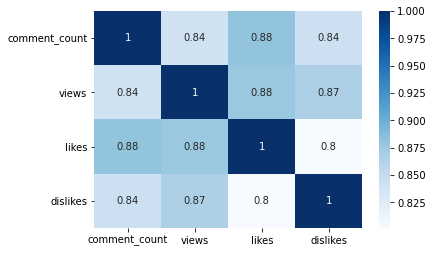

In [5]:
import seaborn as sns
sns.heatmap(data=utube_df_3,cmap='Blues', annot=True)

Q5: create a scatterplot to show the two strongest correlation found in Q3(if its a tie pick two of them).

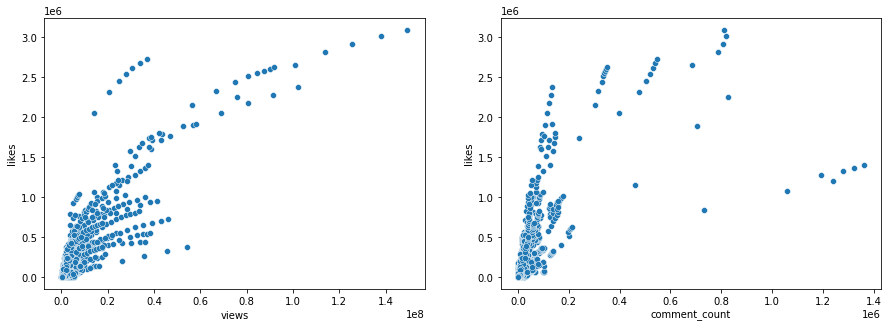

In [6]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
utube_df_5 = utube_df_3.unstack().sort_values()[-8:-4]
title_tuple = pd.Series.keys(utube_df_5)
first_plt = sns.scatterplot(ax=axes[0],data=utube_df, x=title_tuple[0][0], y=title_tuple[0][1])
second_plt = sns.scatterplot(ax=axes[1],data=utube_df, x=title_tuple[2][0], y=title_tuple[2][1])

Q6: Show the number of views in every category for the years 2017-2018.

In [7]:
utube_df['year'] = pd.DatetimeIndex(utube_df['publish_time']).year
utube_df_6 = utube_df.pivot_table(index=['year'],columns='category_id', values='views')
utube_df_6 = utube_df_6.loc['2017':'2018', :]
utube_df_6 = utube_df_6.fillna(0)
utube_df_6

category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
year,,,,,,,,,,,,,,,,
2017,1.523700e+06,673961.717949,2.699066e+06,616435.598291,764014.400802,430884.428571,6.066798e+05,816076.476744,1.139901e+06,1.619840e+06,299529.406607,816109.490296,538659.191489,847030.296108,11013.928571,159222.363636
2018,1.116844e+06,268244.866667,2.936402e+06,517924.841270,570928.972222,261498.344828,1.683533e+06,399114.317647,1.126556e+06,1.217611e+06,237351.269608,430092.593301,397855.081301,581375.204082,25463.555556,0.000000
